# Apparel Retail Bankruptcy Analysis 
### Data Source: 2014 - 2018 10K Filings Data 
#### Goal: Analyze data to determine which apparel retail companies are at risk for bankruptcy.
#### Matthew Chrostowski - Capstone 2 - Springboard March 2020 Cohort

### Key Insights will be noted in the Notebook like this : **[KEY INSIGHT]**

## Capstone Breakdown
### Summary: 
#### In order to determine if an individual retail company is at risk for bankruptcy, I developed a scoring system that compares an indivdual companies' KPI's to the apparel industry as a whole in 4 different categories. Those 4 categories are: 1. Profitability, 2. Liquidity, 3. Efficiency, and 4. Solvency. Each category is broken down into two subsections: Average vs Industry Average and Average % Change vs Inudstry Average pecent change (percent change 2014-2018). The details of the scoring system are listed below.

#### Each category has the following KPI's: 
1. Profitability - Net Profit Margin, Return on Assets, and Return on Equity
2. Liquidity - Current Ratio and Quick Ratio
3. Efficiency - Inventory Turnover and Asset Turnover
4. Solvency - Debt to Equity and Debt to Assets 


In [7]:
#library Imports 

import matplotlib.pyplot as plt
import matplotlib.dates as dts
import pandas as pd 
import seaborn as sb
import statsmodels.api as sm
import numpy as np
import scipy.stats 
import xlwt as xl

In [14]:
#Imported 2014-2018 10K Filings KPI Data and created a 2014-2018 DataFrame with thousands of different companies

df2018 = pd.read_csv("2018_Financial_Data.csv")
df2018.rename( columns={'Unnamed: 0' : 'Ticker'}, inplace = True) # renamed unnamed column "Ticker"
df2018['Year'] = 2018 #added year to column as an identifying column when concating all stock data

df2017 = pd.read_csv(r"C:\Users\mattc\OneDrive\Desktop\2017_Financial_Data.csv") 
df2017.rename( columns={'Unnamed: 0' : 'Ticker'}, inplace = True) # renamed unnamed column "Ticker"
df2017['Year'] = 2017 #added year to column as an identifying column when concating all stock data

df2016 = pd.read_csv(r"C:\Users\mattc\OneDrive\Desktop\2016_Financial_Data.csv")  
df2016.rename( columns={'Unnamed: 0' : 'Ticker'}, inplace = True) # renamed unnamed column "Ticker"
df2016['Year'] = 2016 #added year to column as an identifying column when concating all stock data

df2015 = pd.read_csv(r"C:\Users\mattc\OneDrive\Desktop\2015_Financial_Data.csv")  
df2015.rename( columns={'Unnamed: 0' : 'Ticker'}, inplace = True) # renamed unnamed column "Ticker"
df2015['Year'] = 2015 #added year to column as an identifying column when concating all stock data

df2014 = pd.read_csv(r"C:\Users\mattc\OneDrive\Desktop\2014_Financial_Data.csv")
df2014.rename( columns={'Unnamed: 0' : 'Ticker'}, inplace = True) # renamed unnamed column "Ticker"
df2014['Year'] = 2014 #added year to column as an identifying column when concating all stock data

dataframes = [df2018, df2017, df2016, df2015, df2014]
alldf = pd.concat(dataframes)



In [3]:
#Created an Excel document for all kpi data

alldataxl = pd.ExcelWriter("alldf.xlsx")
alldf.to_excel(alldataxl, index = False)   
alldataxl.save()

In [15]:
#isolated only apparel retail companies for analysis

apparel = ['AEO', 'ANF', 'APEX', 'BKE', 'BOOT', 'BURL', 'CATO',
          'CHS', 'CRI', ' CTRN', 'DBI', 'DLTH', 'DXLG', 'EXPR', 'FRAN',
          'GCO', 'GES', 'GIII', 'GPS', 'JILL', 'LB', 'LULU', 'PLCE', 'ROST', 'SCVL',
          'TJX', 'TLYS', 'URBN',  'ZUMZ']

In [16]:
#filtered out apparel retail companies from rest of kpi data

appareldata = alldf[alldf.Ticker.isin(['AEO', 'ANF', 'APEX', 'BKE', 'BOOT', 'BURL', 'CATO',
                                       'CHS', 'CRI', ' CTRN', 'DBI', 'DLTH', 'DXLG', 'EXPR', 'FRAN',
                                       'GCO', 'GES', 'GIII','GPS', 'JILL', 'LB', 'LULU', 'PLCE', 'ROST', 'SCVL',
                                           'TJX', 'TLYS', 'URBN', 'ZUMZ'])]


In [17]:
#Calculated mean of each KPI from 2014-2018 and created new dataframe for analysis

avgapparel = appareldata.groupby(['Ticker']).mean()
avgapparel = avgapparel.drop(['Year', 'Class'], axis=1)
avgapparel = pd.DataFrame(avgapparel)


In [18]:
#calculated apparel % from 2014 - 2018
allapparel = alldf[alldf.Ticker.isin(['AEO', 'ANF', 'APEX', 'BKE', 'BOOT', 'BURL', 'CATO',
                                       'CHS', 'CRI', ' CTRN', 'DBI', 'DLTH', 'DXLG', 'EXPR', 'FRAN',
                                       'GCO', 'GES', 'GIII','GPS', 'JILL', 'LB', 'LULU', 'PLCE', 'ROST', 'SCVL',
                                           'TJX', 'TLYS', 'URBN', 'ZUMZ'])]

allapparel = pd.DataFrame(allapparel)
allapparel = allapparel.set_index('Ticker')
allapparel = allapparel.sort_values(by=['Ticker','Year'])
allapparel = allapparel.round(2)



In [ ]:
#Generates excel document with caculated means for each KPI

avgappareldata = pd.ExcelWriter("avgapparel.xlsx")
avgapparel.to_excel(avgappareldata, index = True)   # Pulls only avg apparel stock data and creates an excel document
avgappareldata.save()

# PROFITABILITY 
####  Profitability KPI's - Net Profit Margin, Return on Assets, and Return on Equity


## Profitability Industry Average

In [19]:
profitability = avgapparel[['Net Profit Margin', 'returnOnAssets','returnOnEquity']] 
profitability = profitability.round(2)
avgprofitability = profitability.mean()
avgprofitability = avgprofitability.round(2)

print(avgprofitability)

Net Profit Margin    0.05
returnOnAssets       0.16
returnOnEquity       0.51
dtype: float64


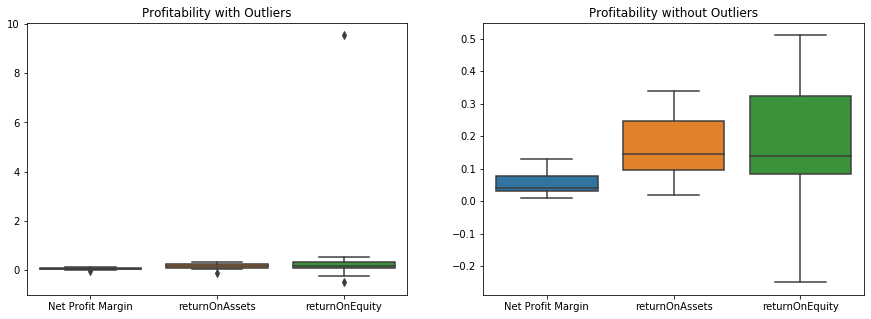

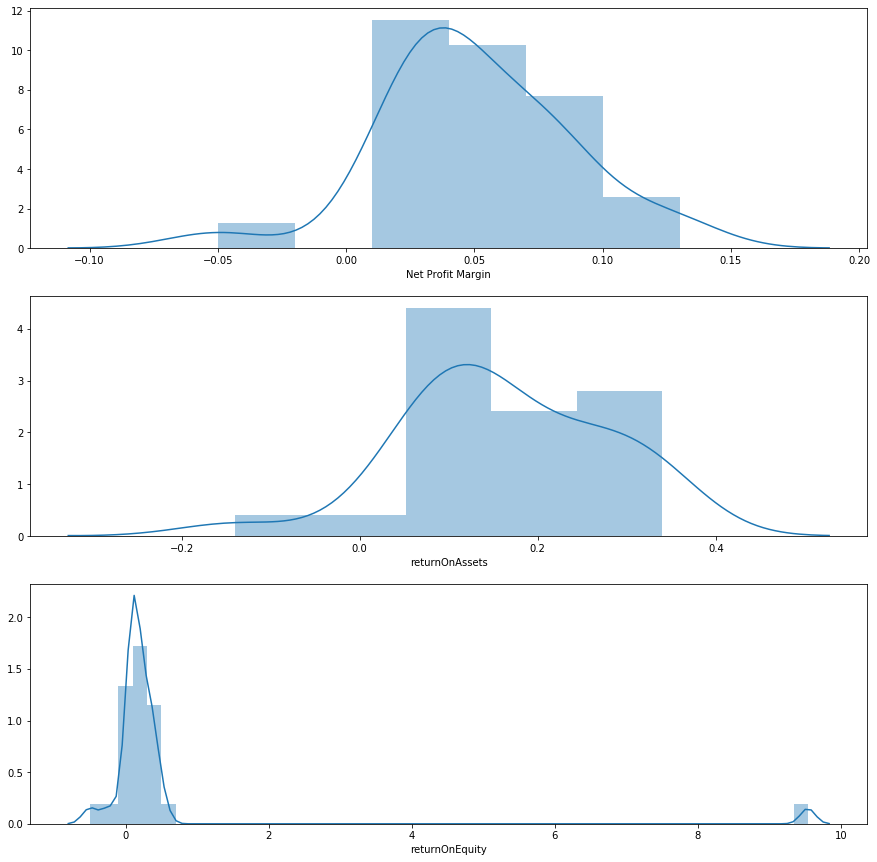

                   Net Profit Margin  returnOnAssets  returnOnEquity
Net Profit Margin           1.000000        0.879524        0.291706
returnOnAssets              0.879524        1.000000        0.269628
returnOnEquity              0.291706        0.269628        1.000000


In [20]:
f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(15, 5)
pbx1 = sb.boxplot(data=profitability, ax=ax1, showfliers=True)
pbx1.set_title('Profitability with Outliers')
pbx2 = sb.boxplot(data=profitability, ax=ax2, showfliers=False)
pbx2.set_title('Profitability without Outliers')


f, (ax1, ax2, ax3) = plt.subplots(3)
f.set_size_inches(15, 15)                
sb.distplot(profitability['Net Profit Margin'], ax=ax1)
sb.distplot(profitability['returnOnAssets'], ax=ax2 )
sb.distplot(profitability['returnOnEquity'], ax=ax3 )
plt.show()


pcorr = profitability.corr()
print(pcorr)

## **[KEY INSIGHT]**

#### 1. The average Net Profit Margin, Return on Assets, and Return on Equity ratios for the industry are almost at 0.  The brick and mortar apparel industry is definitely struggling.  With online giants like Amazon and online newcomers with intense social media marketing, it is clear how damaging it is to the traditional apparel companies. 
#### 2. The outliers are definitely companies that are the highest performing of the bunch. Going forward I am expecting the outliers to be the strongest companies. 

# LIQUIDITY  
####  Liquidity KPI's - Current Ratio and Quick Ratio 

## Liquidity Industry Average

In [21]:
liquidity = avgapparel[['currentRatio','quickRatio']]
liquidity = liquidity.round(2)

avgliquidity = liquidity.mean()
avgliquidity = avgliquidity.round(2)


print(avgliquidity)

currentRatio    2.47
quickRatio      1.11
dtype: float64


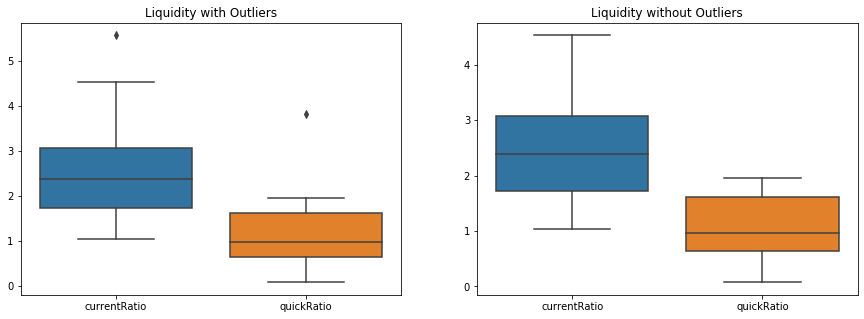

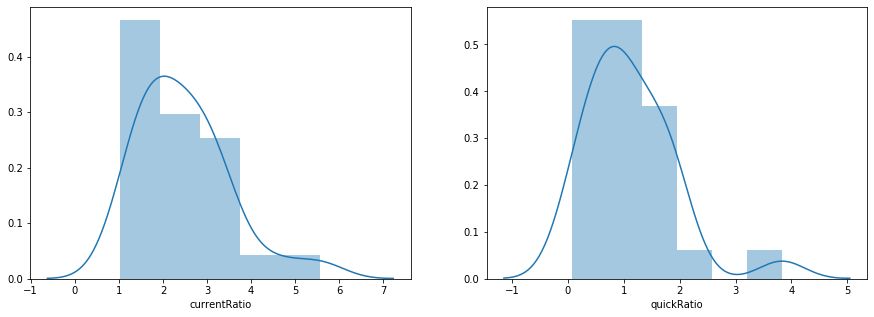

              currentRatio  quickRatio
currentRatio      1.000000    0.812448
quickRatio        0.812448    1.000000


In [22]:
f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(15, 5)
lbx1 = sb.boxplot(data=liquidity, ax=ax1, showfliers=True)
lbx1.set_title('Liquidity with Outliers')
lbx2 = sb.boxplot(data=liquidity, ax=ax2, showfliers=False)
lbx2.set_title('Liquidity without Outliers')


f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(15, 5)                             
sb.distplot(liquidity['currentRatio'], ax=ax1)
sb.distplot(liquidity['quickRatio'], ax=ax2 )
plt.show()


lcorr = liquidity.corr()
print(lcorr)

# EFFICIENCY 
####  Efficiency KPI's - Inventory Turnover and Asset Turnover

### Efficiency Industry Average 

In [23]:
efficiency  = avgapparel[['inventoryTurnover', 'assetTurnover']]
efficiency = efficiency.round(2)

avgefficiency = efficiency.mean()
avgefficiency = avgefficiency.round(2)

print(efficiency)
print(avgefficiency)

        inventoryTurnover  assetTurnover
Ticker                                  
AEO                 11.01           2.04
ANF                  8.09           1.47
BKE                  8.31           1.90
BOOT                 3.62           1.15
BURL                 7.05           1.98
CATO                 6.69           1.59
CHS                 10.95           2.07
CRI                  6.53           1.62
DLTH                 7.35           2.65
DXLG                 3.83           1.72
EXPR                 9.37           1.85
FRAN                16.64           2.39
GCO                  4.67           1.72
GES                  6.73           1.45
GIII                 5.25           1.77
GPS                  8.49           2.07
JILL                 9.62           1.09
LB                  10.75           1.51
LULU                 8.63           1.39
PLCE                 6.06           1.90
ROST                 8.60           2.47
SCVL                 3.42           2.15
TJX             

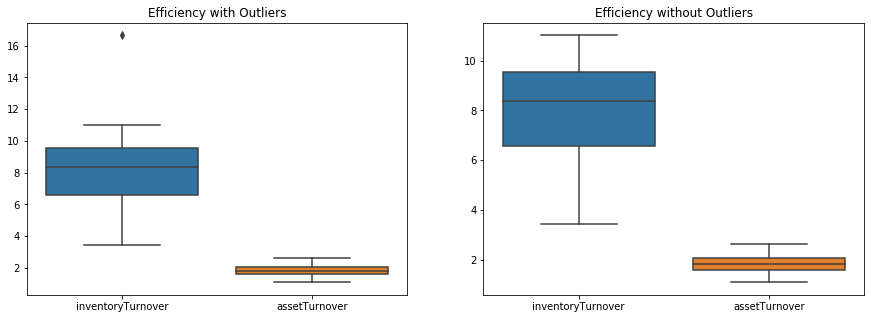

<Figure size 504x360 with 0 Axes>

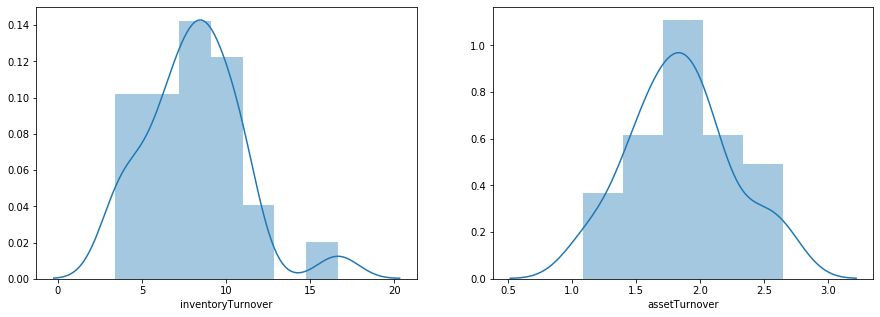

                   inventoryTurnover  assetTurnover
inventoryTurnover           1.000000       0.288982
assetTurnover               0.288982       1.000000


In [24]:
f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(15, 5)
ebx1 = sb.boxplot(data=efficiency, ax=ax1, showfliers=True)
ebx1.set_title('Efficiency with Outliers')
plt.figure(figsize=(7,5))
ebx2 = sb.boxplot(data=efficiency,ax=ax2, showfliers=False)
ebx2.set_title('Efficiency without Outliers')


f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(15, 5)                    
sb.distplot(efficiency['inventoryTurnover'], ax=ax1)
sb.distplot(efficiency['assetTurnover'], ax=ax2 )
plt.show()

ecorr = efficiency.corr()
print(ecorr)

## **[KEY INSIGHT]**

#### 1. Inventory Turnover is how many times a year that a company replaces it's entire inventory. The average company in this dataset replaces it's inventory 8 times a year for the past 5 years. It seems that a lot of the companies have been maintaining this with the IQR being between 6 and 10. 
#### 2. The one company that is a huge outlier is FRAN which replaced it's inventory on average 16.64 over the past 5 years. This is definitely an indicator of a good fianncial position. 

# SOLVENCY 
####  Solvency KPI's - Debt to Equity and Debt to Assets

## Solvency Industry Average

In [25]:
solvency = avgapparel[['Debt to Equity','Debt to Assets' ]]
solvency = solvency.round(2)

avgsolvency = solvency.mean()
avgsolvency = avgsolvency.round(2)

print(solvency)
print(avgsolvency)

        Debt to Equity  Debt to Assets
Ticker                                
AEO               0.00            0.00
ANF               0.22            0.12
BKE               0.00            0.00
BOOT              1.21            0.39
BURL            -10.25            0.47
CATO              0.00            0.00
CHS               0.08            0.04
CRI               0.72            0.30
DLTH              0.12            0.07
DXLG              0.77            0.24
EXPR              0.16            0.06
FRAN              0.06            0.03
GCO               0.08            0.05
GES               0.02            0.01
GIII              0.19            0.11
GPS               0.49            0.18
JILL              1.76            0.44
LB               42.25            0.68
LULU              0.00            0.00
PLCE              0.02            0.01
ROST              0.14            0.07
SCVL              0.00            0.00
TJX               0.40            0.15
TLYS              0.01   

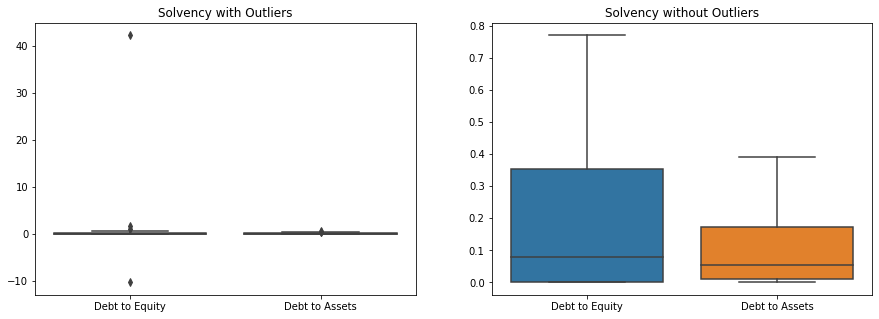

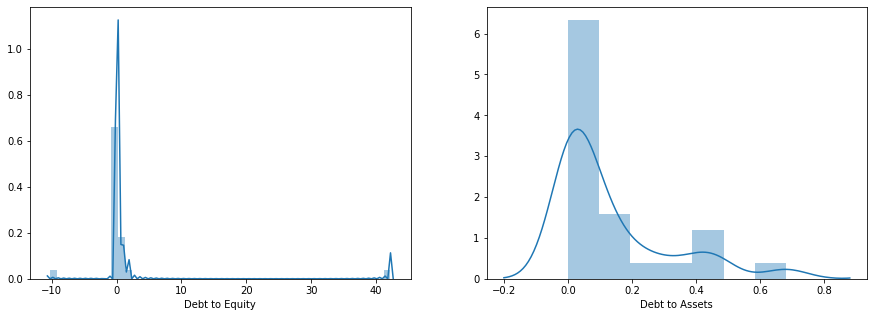

                Debt to Equity  Debt to Assets
Debt to Equity        1.000000        0.532885
Debt to Assets        0.532885        1.000000


In [26]:
f, (ax1, ax2) = plt.subplots(1,2)

f.set_size_inches(15, 5)
                             
sbx1 = sb.boxplot(data=solvency, ax=ax1, showfliers=True)
sbx1.set_title('Solvency with Outliers')
sbx2 = sb.boxplot(data=solvency, ax=ax2, showfliers=False)
sbx2.set_title('Solvency without Outliers')


f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(15, 5)                
sb.distplot(solvency['Debt to Equity'], ax=ax1)
sb.distplot(solvency['Debt to Assets'], ax=ax2 )
plt.show()

scorr = solvency.corr()
print(scorr)

## OVERALL AVERAGE VS INDUSTRY AVERAGE

In [27]:
alltypes = [profitability, liquidity, efficiency, solvency]
typecombo = pd.concat(alltypes,axis=1, sort=False)
overallhealth = pd.DataFrame(typecombo) 

print(overallhealth)

        Net Profit Margin  returnOnAssets  returnOnEquity  currentRatio  \
Ticker                                                                    
AEO                  0.04            0.15            0.14          1.88   
ANF                  0.01            0.02            0.02          2.35   
BKE                  0.12            0.33            0.34          3.28   
BOOT                 0.03            0.12            0.09          1.49   
BURL                 0.03            0.16           -0.51          1.03   
CATO                 0.05            0.12            0.12          2.55   
CHS                  0.03            0.09            0.09          1.70   
CRI                  0.08            0.24            0.31          3.57   
DLTH                 0.08            0.32            0.37          2.59   
DXLG                -0.05           -0.14           -0.25          1.24   
EXPR                 0.03            0.11            0.14          1.92   
FRAN                 0.08

                   Net Profit Margin  returnOnAssets  returnOnEquity  \
Net Profit Margin           1.000000        0.879524        0.291706   
returnOnAssets              0.879524        1.000000        0.269628   
returnOnEquity              0.291706        0.269628        1.000000   
currentRatio                0.422693        0.051616       -0.095267   
quickRatio                  0.538496        0.146909        0.030422   
inventoryTurnover           0.391179        0.403077        0.225250   
assetTurnover               0.147250        0.332710       -0.134794   
Debt to Equity              0.230270        0.189956        0.980929   
Debt to Assets             -0.006742        0.171533        0.584859   

                   currentRatio  quickRatio  inventoryTurnover  assetTurnover  \
Net Profit Margin      0.422693    0.538496           0.391179       0.147250   
returnOnAssets         0.051616    0.146909           0.403077       0.332710   
returnOnEquity        -0.095267    0

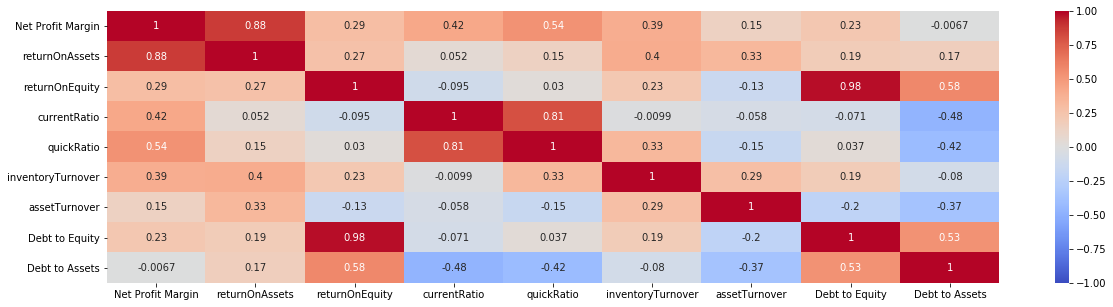

In [28]:
OHcorr = overallhealth.corr()
print(OHcorr)
plt.figure(figsize=(20,5))
sb.heatmap(data=OHcorr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

## **[KEY INSIGHT]**

#### 1. A majority of these variables have no correlation between them which tells me that they are all independent variables that measure very different things for a company. The closest correlations seem to be between variables that measure similar things in a companies performance. 

## Profitbaility Change 2014 - 2018

In [30]:
allapparelP = allapparel[['Year','Net Profit Margin', 'returnOnAssets','returnOnEquity']] 
print(allapparelP)

        Year  Net Profit Margin  returnOnAssets  returnOnEquity
Ticker                                                         
AEO     2014               0.03            0.07            0.07
AEO     2015               0.02            0.08            0.07
AEO     2016               0.06            0.23            0.21
AEO     2017               0.06            0.19            0.18
AEO     2018               0.05            0.17            0.16
...      ...                ...             ...             ...
ZUMZ    2014               0.06            0.16            0.14
ZUMZ    2015               0.05            0.13            0.12
ZUMZ    2016               0.04            0.11            0.10
ZUMZ    2017               0.03            0.10            0.08
ZUMZ    2018               0.03            0.09            0.08

[127 rows x 4 columns]


## Liquidity Change 2014 - 2018

In [29]:
allapparelL = allapparel[['currentRatio','quickRatio']]
print(allapparelL)

        currentRatio  quickRatio
Ticker                          
AEO             2.23        1.21
AEO             1.80        1.04
AEO             1.56        0.74
AEO             1.82        0.94
AEO             2.00        1.01
...              ...         ...
ZUMZ            3.74        2.08
ZUMZ            3.35        2.05
ZUMZ            2.88        1.28
ZUMZ            2.87        1.24
ZUMZ            2.81        1.40

[127 rows x 2 columns]


## Efficiency Change 2014 - 2018

In [31]:
allapparelE = allapparel[['inventoryTurnover', 'assetTurnover']]
print(allapparelE)

        inventoryTurnover  assetTurnover
Ticker                                  
AEO                 10.60           1.95
AEO                 11.51           1.93
AEO                 12.06           2.18
AEO                 10.88           2.02
AEO                 10.03           2.09
...                   ...            ...
ZUMZ                 8.79           1.63
ZUMZ                 8.97           1.64
ZUMZ                 8.37           1.94
ZUMZ                 8.15           1.96
ZUMZ                 7.97           1.86

[127 rows x 2 columns]


## Solvency Change 2014 - 2018

In [32]:
allapparelS = allapparel[['Debt to Equity','Debt to Assets' ]]
print(allapparelS)

        Debt to Equity  Debt to Assets
Ticker                                
AEO               0.00            0.00
AEO               0.00            0.00
AEO               0.00            0.00
AEO               0.00            0.00
AEO               0.00            0.00
...                ...             ...
ZUMZ              0.01            0.01
ZUMZ              0.00            0.00
ZUMZ              0.00            0.00
ZUMZ              0.00            0.00
ZUMZ              0.00            0.00

[127 rows x 2 columns]


## Overall Change 2014 - 2018

In [33]:
annualhealth = [allapparelP, allapparelL, allapparelE, allapparelS]
annualhealth = pd.concat(annualhealth, axis=1, sort=False)
annualhealth = pd.DataFrame(annualhealth)



## Overall % Change 2014 - 2018

In [34]:
annualhealth['NPM_Percent_Change'] = (annualhealth.groupby('Ticker')['Net Profit Margin']
                                  .apply(pd.Series.pct_change) + 0)
annualhealth['ROA_Percent_Change'] = (annualhealth.groupby('Ticker')['returnOnAssets']
                                  .apply(pd.Series.pct_change) + 0)
annualhealth['ROE_Percent_Change'] = (annualhealth.groupby('Ticker')['returnOnEquity']
                                  .apply(pd.Series.pct_change) + 0)
annualhealth['CR_Percent_Change'] = (annualhealth.groupby('Ticker')['currentRatio']
                                  .apply(pd.Series.pct_change) + 0)
annualhealth['QR_Percent_Change'] = (annualhealth.groupby('Ticker')['quickRatio']
                                  .apply(pd.Series.pct_change) + 0)
annualhealth['IT_Percent_Change'] = (annualhealth.groupby('Ticker')['currentRatio']
                                  .apply(pd.Series.pct_change) + 0)
annualhealth['AT_Percent_Change'] = (annualhealth.groupby('Ticker')['assetTurnover']
                                  .apply(pd.Series.pct_change) + 0)
annualhealth['DTE_Percent_Change'] = (annualhealth.groupby('Ticker')['Debt to Equity']
                                  .apply(pd.Series.pct_change) + 0)
annualhealth['DTA_Percent_Change'] = (annualhealth.groupby('Ticker')['Debt to Assets']
                                  .apply(pd.Series.pct_change) + 0)


annualtickerperchange = annualhealth[['NPM_Percent_Change','ROA_Percent_Change','ROE_Percent_Change',
                         'CR_Percent_Change','QR_Percent_Change','IT_Percent_Change', 
                         'AT_Percent_Change','DTE_Percent_Change','DTA_Percent_Change']]



print(annualtickerperchange)

        NPM_Percent_Change  ROA_Percent_Change  ROE_Percent_Change  \
Ticker                                                               
AEO                    NaN                 NaN                 NaN   
AEO              -0.333333            0.142857            0.000000   
AEO               2.000000            1.875000            2.000000   
AEO               0.000000           -0.173913           -0.142857   
AEO              -0.166667           -0.105263           -0.111111   
...                    ...                 ...                 ...   
ZUMZ                   NaN                 NaN                 NaN   
ZUMZ             -0.166667           -0.187500           -0.142857   
ZUMZ             -0.200000           -0.153846           -0.166667   
ZUMZ             -0.250000           -0.090909           -0.200000   
ZUMZ              0.000000           -0.100000            0.000000   

        CR_Percent_Change  QR_Percent_Change  IT_Percent_Change  \
Ticker                

## Average % Change 2014 - 2018: Company vs Industry

In [39]:
avgperticker = pd.DataFrame()

avgperticker['npmperavg'] = annualtickerperchange.groupby('Ticker')['NPM_Percent_Change'].mean()

avgperticker['roaperavg'] = annualtickerperchange.groupby('Ticker')['ROA_Percent_Change'].mean()

avgperticker['roeperavg'] = annualtickerperchange.groupby('Ticker')['ROE_Percent_Change'].mean()

avgperticker['crperavg'] = annualtickerperchange.groupby('Ticker')['CR_Percent_Change'].mean()

avgperticker['qrperavg'] = annualtickerperchange.groupby('Ticker')['QR_Percent_Change'].mean()

avgperticker['itperavg'] = annualtickerperchange.groupby('Ticker')['IT_Percent_Change'].mean()

avgperticker['atperavg'] = annualtickerperchange.groupby('Ticker')['AT_Percent_Change'].mean()

avgperticker['dteperavg'] = annualtickerperchange.groupby('Ticker')['DTE_Percent_Change'].mean()

avgperticker['dtaperavg'] = annualtickerperchange.groupby('Ticker')['DTA_Percent_Change'].mean()


avgperticker[np.isnan(avgperticker)] = 0
avgperticker[np.isinf(avgperticker)] = 0


print(avgperticker)


avgperindustry = avgperticker.mean()
avgperindustry = pd.DataFrame(avgperindustry)
print(avgperindustry)



        npmperavg  roaperavg  roeperavg  crperavg  qrperavg  itperavg  \
Ticker                                                                  
AEO      0.375000   0.434670   0.436508 -0.015148 -0.021055 -0.015148   
ANF     -0.333333  -0.444444   0.000000  0.019722  0.061280  0.019722   
BKE     -0.075549  -0.136009  -0.139070  0.082297  0.131224  0.082297   
BOOT     0.291667   0.199937   0.246726  0.062578  0.233631  0.062578   
BURL     0.000000   1.112554   2.108547 -0.030882  0.077273 -0.030882   
CATO    -0.229762  -0.215705  -0.214286  0.018063  0.008475  0.018063   
CHS      0.000000   0.000000   0.000000  0.054492  0.181295  0.054492   
CRI      0.052249   0.165139   0.098297 -0.083997 -0.137691 -0.083997   
DLTH    -0.150000  -0.202737  -0.188271  0.099390  0.679642  0.099390   
DXLG     0.000000   1.449887   1.974084 -0.051589  0.018624 -0.051589   
EXPR    -0.200000  -0.166667  -0.282412  0.008866 -0.021936  0.008866   
FRAN    -0.243590  -0.181661  -0.216964 -0.105858 -

## **[KEY INSIGHT]**

#### 1. There seems to be a lot of negative average percent changes with a lot of these KPI's. This shows that the industry as a whole is losing financial strengh over time. Fortunately, these percentage losses appear to be gradual from 2014-2018, but it does look like a major event like a recession, pandemic, multiple hurricanes, earthquakes, or muder hornets could really tip this industry over the edge. Good thing in 2014-2018 everything is okay....


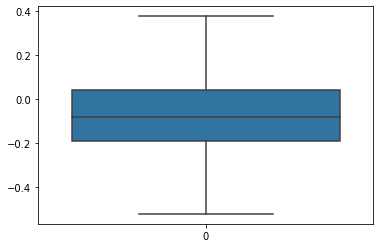

In [43]:
sb.boxplot(data=avgperticker['npmperavg'],showfliers=False)


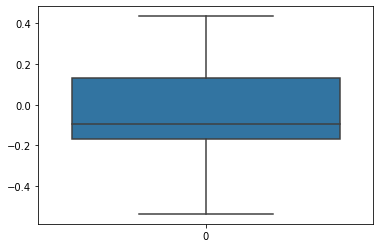

In [44]:
sb.boxplot(data=avgperticker['roaperavg'],showfliers=False)


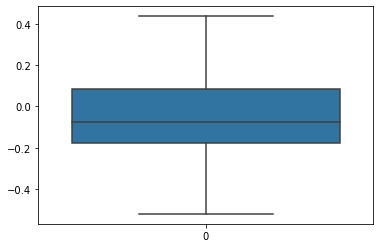

In [45]:
sb.boxplot(data=avgperticker['roeperavg'],showfliers=False)

## **[KEY INSIGHT]**

#### 1. Profitability seems to fall under that -0.2 to 0.2 range for average percent change. Companies are having slow profit growth or slow losses over time and show me that these companies are definitely at a huge risk for failure in the future. 

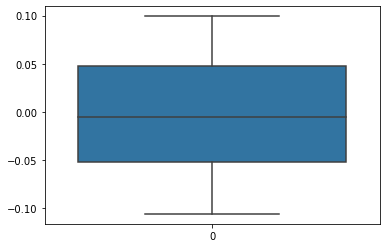

In [47]:
sb.boxplot(data=avgperticker['crperavg'],showfliers=False)

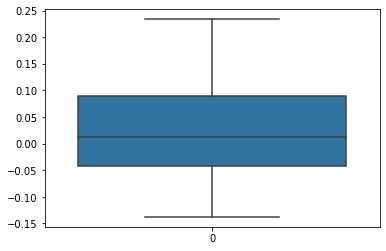

In [46]:
sb.boxplot(data=avgperticker['qrperavg'],showfliers=False)

## **[KEY INSIGHT]**

#### 1. The average percent change for the current ratio and quick ratio KPI's seem to be indicating similar behavior that the Profitability indicators are showing. 

# APPAREL INDUSTRY SCALE 

#### As seen above, the average profitability, liquidity, efficiency, and solvency was calculated in conjuction with the average profitability % change, liquidity % change, efficiency % change, and solvency % change. With this in mind, I assigned a point system for each category comparing an individual companie's average KPI  (example: AEO Average Net Profit Margin) versus the industry average KPI (example: All Apparel Company's Average Net Profit Margin). Every time a companies' KPI was above the industry average or average % change it was given 1 point. This point system is designed to highlight companies that have KPI's higher than the industry average. It is also designed to highlight companies with a higher average percent change (2014-2018) than the industry average percent change.

## PROFITABILITY SCALE

In [266]:
#profitabilityrank 

overallhealth.loc[overallhealth['Net Profit Margin'] > .05, 'npmScore'] = 1 
overallhealth.loc[overallhealth['Net Profit Margin'] < .05, 'npmScore'] = 0 
overallhealth.loc[overallhealth['returnOnAssets'] > .15, 'roaScore'] = 1 
overallhealth.loc[overallhealth['returnOnAssets'] < .15, 'roaScore'] = 0 
overallhealth.loc[overallhealth['returnOnEquity'] > .14, 'roeScore'] = 1 
overallhealth.loc[overallhealth['returnOnEquity'] < .14, 'roeScore'] = 0

avgperticker.loc[avgperticker['npmperavg'] > -0.030 , 'npmScoreP'] = 1 
avgperticker.loc[avgperticker['npmperavg'] < -0.030 , 'npmScoreP'] = 0
avgperticker.loc[avgperticker['roaperavg'] > 0.045 , 'roaScoreP'] = 1 
avgperticker.loc[avgperticker['roaperavg'] < 0.045 , 'roaScoreP'] = 0
avgperticker.loc[avgperticker['roeperavg'] > -0.146 , 'roeScoreP'] = 1 
avgperticker.loc[avgperticker['roeperavg'] < -0.146 , 'roeScoreP'] = 0

overallhealth[np.isnan(overallhealth)] = 0


profitscore1 = overallhealth[['npmScore','roaScore','roeScore']]
profitscore2 = avgperticker[['npmScoreP','roaScoreP','roeScoreP']]
profitscore1 = pd.DataFrame(profitscore1)
profitscore2 = pd.DataFrame(profitscore2)

totalprofitscore = pd.concat([profitscore1, profitscore2],axis=1)
totalprofitscore = pd.DataFrame(totalprofitscore)
totalprofitscore['ProfitabilityScore'] = totalprofitscore.sum(axis=1)





## LIQUIDITY SCALE

In [267]:
#liquidityrank 

overallhealth.loc[overallhealth['currentRatio'] > 2.47, 'crScore'] = 1 
overallhealth.loc[overallhealth['currentRatio'] < 2.47, 'crScore'] = 0 
overallhealth.loc[overallhealth['quickRatio'] > 1.11, 'qrScore'] = 1 
overallhealth.loc[overallhealth['quickRatio'] < 1.11, 'qrScore'] = 0 

avgperticker.loc[avgperticker['crperavg'] > -0.004 , 'crScoreP'] = 1 
avgperticker.loc[avgperticker['crperavg'] < -0.004 , 'crScoreP'] = 0
avgperticker.loc[avgperticker['qrperavg'] > 0.048 , 'qrScoreP'] = 1 
avgperticker.loc[avgperticker['qrperavg'] < 0.048 , 'qrScoreP'] = 0


overallhealth[np.isnan(overallhealth)] = 0


liquidscore1 = overallhealth[['crScore','qrScore']]
liquidscore2 = avgperticker[['crScoreP','qrScoreP',]]
liquidscore1 = pd.DataFrame(liquidscore1)
liquidscore2 = pd.DataFrame(liquidscore2)

totalliquidscore = pd.concat([liquidscore1, liquidscore2],axis=1)
totalliquidscore = pd.DataFrame(totalliquidscore)
totalliquidscore['LiquidityScore'] = totalliquidscore.sum(axis=1)




## EFFICIENCY SCALE

In [268]:
#efficiencyrank 

overallhealth.loc[overallhealth['inventoryTurnover'] > 8.1, 'itScore'] = 1 
overallhealth.loc[overallhealth['inventoryTurnover'] < 8.1, 'itScore'] = 0 
overallhealth.loc[overallhealth['assetTurnover'] > 1.8, 'atScore'] = 1 
overallhealth.loc[overallhealth['assetTurnover'] < 1.8, 'atScore'] = 0 


avgperticker.loc[avgperticker['itperavg'] > -0.004 , 'itScoreP'] = 1 
avgperticker.loc[avgperticker['itperavg'] < -0.004 , 'itScoreP'] = 0
avgperticker.loc[avgperticker['atperavg'] > 0.013 , 'atScoreP'] = 1 
avgperticker.loc[avgperticker['atperavg'] < 0.013 , 'atScoreP'] = 0


overallhealth[np.isnan(overallhealth)] = 0


efficiencyscore1 = overallhealth[['itScore','atScore']]
efficiencyscore2 = avgperticker[['itScoreP','atScoreP',]]
efficiencyscore1 = pd.DataFrame(efficiencyscore1)
efficiencyscore2 = pd.DataFrame(efficiencyscore2)

totalefficientscore = pd.concat([liquidscore1, liquidscore2],axis=1)
totalefficientscore = pd.DataFrame(totalefficientscore)
totalefficientscore['EfficiencyScore'] = totalefficientscore.sum(axis=1)




## SOLVENCY SCALE

In [269]:
#solvencyrank

overallhealth.loc[overallhealth['Debt to Equity'] > 1.48, 'dteScore'] = 1 
overallhealth.loc[overallhealth['Debt to Equity'] < 1.48, 'dteScore'] = 0 
overallhealth.loc[overallhealth['Debt to Assets'] > 0.13, 'dtaScore'] = 1 
overallhealth.loc[overallhealth['Debt to Assets'] < 0.13, 'dtaScore'] = 0 


avgperticker.loc[avgperticker['dteperavg'] > -0.230 , 'dteScoreP'] = 1 
avgperticker.loc[avgperticker['dteperavg'] < -0.230 , 'dteScoreP'] = 0
avgperticker.loc[avgperticker['dtaperavg'] > -0.047 , 'dtaScoreP'] = 1 
avgperticker.loc[avgperticker['dtaperavg'] < -0.047 , 'dtaScoreP'] = 0


overallhealth[np.isnan(overallhealth)] = 0


solvencyscore1 = overallhealth[['dteScore','dtaScore']]
solvencyscore2 = avgperticker[['dteScoreP','dtaScoreP',]]
solvencyscore1 = pd.DataFrame(solvencyscore1)
solvencyscore2 = pd.DataFrame(solvencyscore2)

totalsolvencyscore = pd.concat([liquidscore1, liquidscore2],axis=1)
totalsolvencyscore = pd.DataFrame(totalsolvencyscore)
totalsolvencyscore['SolvencyScore'] = totalsolvencyscore.sum(axis=1)



## OVERALL SCALE - APPAREL INDUSTRY SCALE

In [330]:
p = totalprofitscore['ProfitabilityScore']
l = totalliquidscore['LiquidityScore']
e = totalefficientscore['EfficiencyScore']
s = totalsolvencyscore['SolvencyScore'] 

FashionScale = [p,l,e,s]
FashionScale = pd.concat(FashionScale,axis=1)
ApparelCompanyScale = pd.DataFrame(FashionScale)
ApparelCompanyScale['OverallCompanyHealth'] = ApparelCompanyScale.sum(axis=1)

ApparelCompanyScale = ApparelCompanyScale.sort_values(by='OverallCompanyHealth', ascending=False)
print(ApparelCompanyScale.mean())

# create a list of our conditions
conditions = [
    (ApparelCompanyScale['OverallCompanyHealth'] < 6),
    (ApparelCompanyScale['OverallCompanyHealth'] >= 6) & (ApparelCompanyScale['OverallCompanyHealth'] <= 8),
    (ApparelCompanyScale['OverallCompanyHealth'] > 8) & (ApparelCompanyScale['OverallCompanyHealth'] <= 10),
    (ApparelCompanyScale['OverallCompanyHealth'] > 10)
    ]

# create a list of the values we want to assign for each condition
values = ["Weak Financial Position", "Good Finanical Position", "Great Financial Position", "Excellent Financial Position"]

# create a new column and use np.select to assign values to it using our lists as arguments
ApparelCompanyScale['Financial Position'] = np.select(conditions, values)

# display updated DataFrame
print(ApparelCompanyScale)

ProfitabilityScore      2.692308
LiquidityScore          1.807692
EfficiencyScore         1.807692
SolvencyScore           1.807692
OverallCompanyHealth    8.115385
dtype: float64
        ProfitabilityScore  LiquidityScore  EfficiencyScore  SolvencyScore  \
Ticker                                                                       
BKE                    4.0             4.0              4.0            4.0   
GIII                   1.0             4.0              4.0            4.0   
CRI                    6.0             2.0              2.0            2.0   
DLTH                   3.0             3.0              3.0            3.0   
ROST                   5.0             2.0              2.0            2.0   
LB                     4.0             2.0              2.0            2.0   
GPS                    4.0             2.0              2.0            2.0   
ANF                    1.0             3.0              3.0            3.0   
LULU                   4.0             2

## **[KEY INSIGHT]**

#### 1. The companies that had outliers throuhout the analysis tended to be in the great and excellent financial position. After futher reasearch I found that companies in the "Excellent Financial Position like BKE really focused on online sales to outperform the competition.
#### 2. The company G-III actually focused on cost controls, online sales,  and landed a collaboration deal with a professional sports league. This combination definitely put them at the number 2 spot in the Apparel Industry Scale.
#### 3. Overall the companies embracing online sales and staying current with trends and pop culture are showing the strongest futures. 

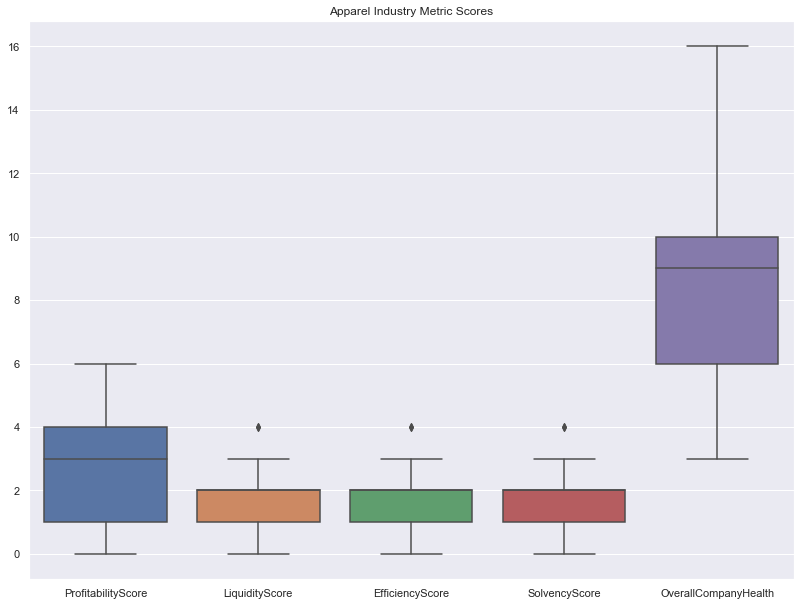

In [252]:
sb.set(rc={'figure.figsize':(13.7,10.27)})
rc = sb.boxplot(data=ApparelCompanyScale).set_title("Apparel Industry Metric Scores")


## Calculating a Z-Score

#### The Z-Score is a common indicator used to determine if a company is at risk for bankruptcy. This doesn't guarentee a company will go bankrupt, but simply an idicator for it. 

In [304]:
A = 1.2*(avgapparel['Working Capital']/avgapparel['Total assets'])
B = 1.4*(avgapparel['Retained earnings (deficit)']/avgapparel['Total assets'])
C = 3.3*(avgapparel['EBIT']/avgapparel['Total assets'])
D = 0.6*(avgapparel['Total shareholders equity']/avgapparel['Total liabilities'])
E = 1.0*(avgapparel['Revenue']/avgapparel['Total assets'])


ZScore = [A, B, C, D, E]
ZScore = pd.concat(ZScore,axis=1)
ZScore = pd.DataFrame(ZScore)
ZScore['Z-Score'] = ZScore.sum(axis=1)

print(ZScore)

               0         1         2         3         4   Z-Score
Ticker                                                            
AEO     0.283447  1.372216  0.476557  1.247551  2.036194  5.415963
ANF     0.337058  1.413733  0.091534  0.753501  1.466405  4.062231
BKE     0.529577  0.643187  1.247262  1.413575  1.902507  5.736108
BOOT    0.158185  0.086898  0.242886  0.305889  1.136097  1.929955
BURL    0.011428 -0.628775  0.380833 -0.012392  1.979771  1.730865
CATO    0.536608  0.677316  0.378518  1.056544  1.590803  4.239787
CHS     0.196918  0.610819  0.283525  0.933930  2.057440  4.082631
CRI     0.448399  0.602087  0.647903  0.424383  1.625577  3.748349
DLTH    0.458276  0.317059  0.743630  1.135484  2.470332  5.124781
DXLG    0.118763 -0.713869 -0.117323  0.273781  1.701521  1.262874
EXPR    0.270583  0.697174  0.379518  0.571575  1.846047  3.764897
FRAN    0.437037  0.789600  1.074080  0.961599  2.392386  5.654702
GCO     0.363138  0.699689  0.245902  1.028972  1.728904  4.06

## Comparing Apparel Industry Scale vs Z-Score

### Comparing the Apparel Industry Scale with the Z-Score was a method to verify how accurate the Apparel Industry Scale (AIS) is. The AIS highlighted similar companies that were not performing well that the Z-Score identified as well. 

In [317]:
ApparelCompanyScale['Z-Score'] = ZScore['Z-Score']
# create a list of our conditions
conditions = [
    (ApparelCompanyScale['Z-Score'] < 1.81),
    (ApparelCompanyScale['Z-Score'] >= 1.81) & (ApparelCompanyScale['Z-Score'] <= 2.98),
    (ApparelCompanyScale['OverallCompanyHealth'] > 2.99) 
    ]

# create a list of the values we want to assign for each condition
values = ["Considerable risk of Bankruptcy", "Somewhat at Risk for Bankruptcy", "Safe from Bankruptcy"]

# create a new column and use np.select to assign values to it using our lists as arguments
ApparelCompanyScale['Bankruptcy Risk'] = np.select(conditions, values)



print(ApparelCompanyScale)

        ProfitabilityScore  LiquidityScore  EfficiencyScore  SolvencyScore  \
Ticker                                                                       
BKE                    4.0             4.0              4.0            4.0   
GIII                   1.0             4.0              4.0            4.0   
CRI                    6.0             2.0              2.0            2.0   
DLTH                   3.0             3.0              3.0            3.0   
ROST                   5.0             2.0              2.0            2.0   
LB                     4.0             2.0              2.0            2.0   
GPS                    4.0             2.0              2.0            2.0   
ANF                    1.0             3.0              3.0            3.0   
LULU                   4.0             2.0              2.0            2.0   
SCVL                   1.0             3.0              3.0            3.0   
FRAN                   3.0             2.0              2.0     

## **[KEY INSIGHT]**

#### 1. Seeing certain companies with poor Z-Scores made a lot of sense based on my AIS scale. There is one that definitely surprised me which was LB. According to my scale, LB is in a "great financial positon" but it was still marked with a low Z-Score and is Somewhat at Risk for Bakruptcy. This shows me that I may need to include another KPI to make my scale more accurate. 

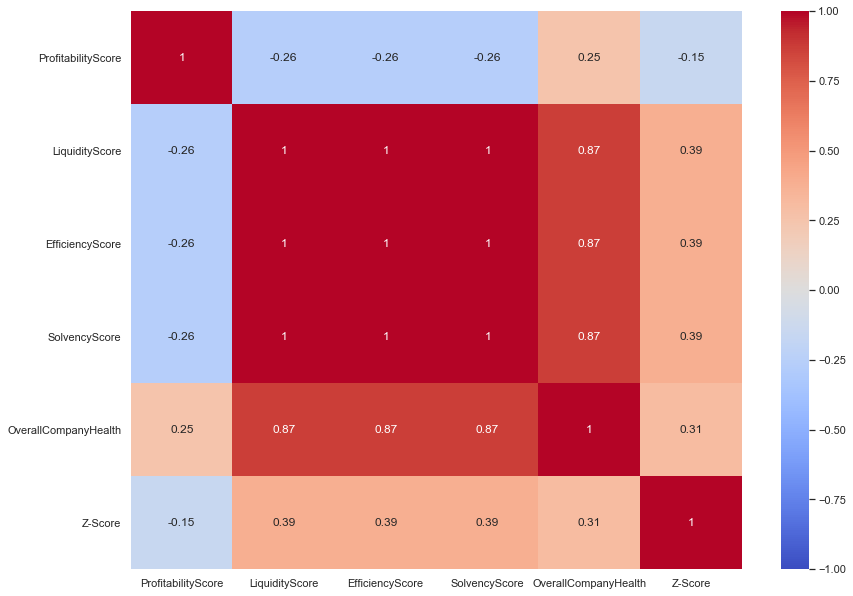

In [319]:
acscorr = ApparelCompanyScale.corr()
sb.heatmap(data=acscorr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

In [334]:
AIS = pd.ExcelWriter("AIS.xlsx")
ApparelCompanyScale.to_excel(AIS, index = False #data is generated into an excel document
AIS.save()